# This project is built using PyTorch's [TorchRec](https://pytorch.org/torchrec/setup-torchrec.html)

Training Baseline Model...


100%|█████████████████████████████████████████████████| 1840/1840 [02:43<00:00, 11.25it/s]


Epoch 1/10, Loss: 1.59, Val Loss: 1.27


100%|█████████████████████████████████████████████████| 1840/1840 [02:45<00:00, 11.14it/s]


Epoch 2/10, Loss: 1.09, Val Loss: 0.98


100%|█████████████████████████████████████████████████| 1840/1840 [02:51<00:00, 10.75it/s]


Epoch 3/10, Loss: 0.89, Val Loss: 0.88


100%|█████████████████████████████████████████████████| 1840/1840 [02:37<00:00, 11.72it/s]


Epoch 4/10, Loss: 0.80, Val Loss: 0.83


100%|█████████████████████████████████████████████████| 1840/1840 [02:44<00:00, 11.18it/s]


Epoch 5/10, Loss: 0.75, Val Loss: 0.79


100%|█████████████████████████████████████████████████| 1840/1840 [02:33<00:00, 11.96it/s]


Epoch 6/10, Loss: 0.70, Val Loss: 0.75


100%|█████████████████████████████████████████████████| 1840/1840 [02:43<00:00, 11.28it/s]


Epoch 7/10, Loss: 0.61, Val Loss: 0.66


100%|█████████████████████████████████████████████████| 1840/1840 [02:36<00:00, 11.76it/s]


Epoch 8/10, Loss: 0.51, Val Loss: 0.57


100%|█████████████████████████████████████████████████| 1840/1840 [02:40<00:00, 11.45it/s]


Epoch 9/10, Loss: 0.43, Val Loss: 0.51


100%|█████████████████████████████████████████████████| 1840/1840 [02:47<00:00, 11.01it/s]


Epoch 10/10, Loss: 0.37, Val Loss: 0.47


100%|█████████████████████████████████████████████████| 1840/1840 [02:44<00:00, 11.16it/s]


Epoch 11/10, Loss: 0.34, Val Loss: 0.44


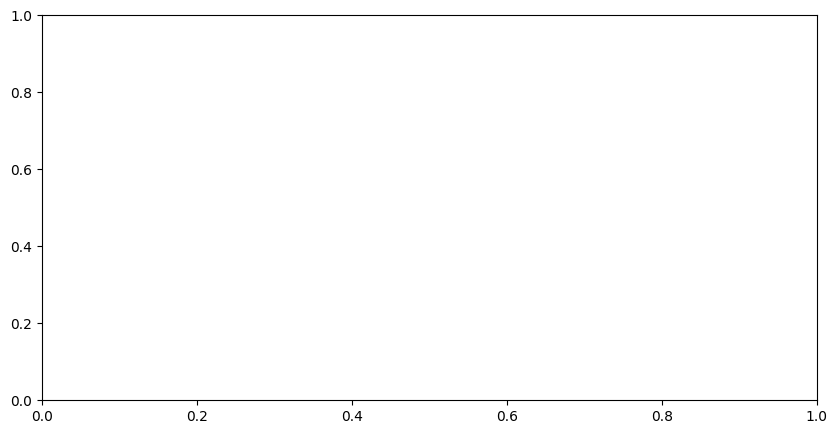

In [69]:
print("Training Baseline Model...")
train_model(
    baseline_model,
    train_loader,
    lr=0.001,
    num_epochs=10,
    device=device,
)


This method is too slow! TODO: Find another way of splitting the dataset into train and test, making sure that all users appear on both the train and test set.

In [92]:
result_df = test_data.with_columns(
    pl.Series("pred", baseline_predictions.numpy()),
)
test_id = 11
train_data.filter(pl.col("user_id") == rev_user_id_map[test_id])

# result_df.with_columns(pl.when(pl.col("pred") > 0.5).then(1).otherwise(0).alias("pred"))


app_id,helpful,funny,is_recommended,hours,user_id,review_id
i32,i64,i64,i8,f32,i32,i64
3807,5,0,1,110.199997,232,12293233
15745,0,0,1,3.0,232,38393731
20,6,2,1,34.0,232,38430844
1112,10,2,1,214.0,232,38506322
2512,4,5,0,10.0,232,38572799
…,…,…,…,…,…,…
21324,0,0,1,2.0,232,40840774
14815,6,3,1,68.0,232,40879040
1233,0,2,1,119.0,232,41037281


In [93]:
result_df = result_df.with_columns(
    [
        pl.col("user_id").replace(rev_user_id_map).alias("user_id"),
        pl.col("app_id").replace(rev_game_id_map).alias("app_id"),
    ]
)
result_df = result_df.filter(pl.col("user_id") == rev_user_id_map[test_id])
result_df.sort("pred", descending=True)

user_id,app_id,helpful,funny,is_recommended,hours,review_id,pred
i32,i32,i64,i64,i8,f32,i64,f32
232,221040,0,0,0,2.4,14199417,0.84187
